# Model training
##### algom_trading_v001_dev

#### Resources
- ticker = `BTC-USDT`
- outcome = `ROR_n5`
- model_id(s) = 

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [1]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [2]:
# Load model data
data = dataObject("""
SELECT * EXCEPT (
  conversionType,
  conversionSymbol,
  partition_date)
FROM `algom-trading.train_features.features_BTC_USDT_hour_i02_*`
WHERE _table_suffix in (
    '20180101',
    '20190101')
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 20002/20002 [00:24<00:00, 829.45rows/s]

SUCCESS: Loaded SQL query.


In [3]:
# Drop nan values
# data.df = data.df.dropna()
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

18670


,ticker_time_sec,close,high,low,open,volume_base,volume,etl_time,ticker_time,ticker,...,MACDdiff_9_12,MACD_26_200,MACDsign_26_200,MACDdiff_26_200,MACD_20_200,MACDsign_20_200,MACDdiff_20_200,RSI_,Mass_Index_9_25,SO_pct_k
300,1576756800,7189.53,7220.00,7142.03,7150.00,2726.43,19578681.07,2021-01-01 15:41:27.241073+00:00,2019-12-19 12:00:00+00:00,BTC-USDT,...,-7141.919143,-82.936132,7142.084855,-7225.020987,-84.714987,7142.084855,-7226.799842,0.771628,26.797976,0.609209
301,1576753200,7150.00,7179.99,7123.79,7153.73,1588.91,11371558.98,2021-01-01 15:41:27.241073+00:00,2019-12-19 11:00:00+00:00,BTC-USDT,...,-7143.162351,-81.737662,7143.667884,-7225.405546,-83.237013,7143.667884,-7226.904897,0.606542,26.807537,0.466370
302,1576749600,7153.73,7200.00,7120.12,7121.23,3594.43,25760592.29,2021-01-01 15:41:27.241073+00:00,2019-12-19 10:00:00+00:00,BTC-USDT,...,-7144.788144,-80.339352,7145.680307,-7226.019659,-81.515032,7145.680307,-7227.195339,0.708994,26.912611,0.420756
303,1576746000,7121.23,7159.62,7038.31,7076.20,3149.49,22332890.88,2021-01-01 15:41:27.241073+00:00,2019-12-19 09:00:00+00:00,BTC-USDT,...,-7141.163814,-81.064098,7140.790246,-7221.854344,-82.648162,7140.790246,-7223.438407,0.273018,27.194383,0.683538
304,1576742400,7076.20,7117.15,7066.00,7092.54,2007.77,14239767.33,2021-01-01 15:41:27.241073+00:00,2019-12-19 08:00:00+00:00,BTC-USDT,...,-7131.169381,-84.531161,7127.872196,-7212.403357,-87.399185,7127.872196,-7215.271381,0.273018,27.351569,0.199413


<br>

### Initialize modelRegression class

In [4]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n5',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)


SUCCESS: Loaded dataObject.
Initialized model. As a next step, run self.predict() or self.train().


In [7]:
# Specify regression parameters
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1,
    n_estimators=800,
    subsample=.9,
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, 
    max_depth=10,
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None,
    random_state=None, 
    max_features=None, 
    alpha=0.9, 
    verbose=0,
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001
)


# Train model
model.train(reg)


Training model on ROR_n5.
Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Set feature_importance to `self.feature_importance.feature_importance`
Fit model in 0:00:00.000023.
Get model performance.
Set evaluation to self.evaluations in 0:00:00.000023.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.00897
        - Mean Absolute Outcome:	 0.01223
        - Mean Absolute Percent Error:	 0.73352
        - Error Variance:	 0.00023
        - R-Squared:		 0.40821
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predicti

In [ ]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


In [ ]:
# Save model (optional)
model.save()


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [18]:
start_date='2019-01-01'
end_date='2019-02-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


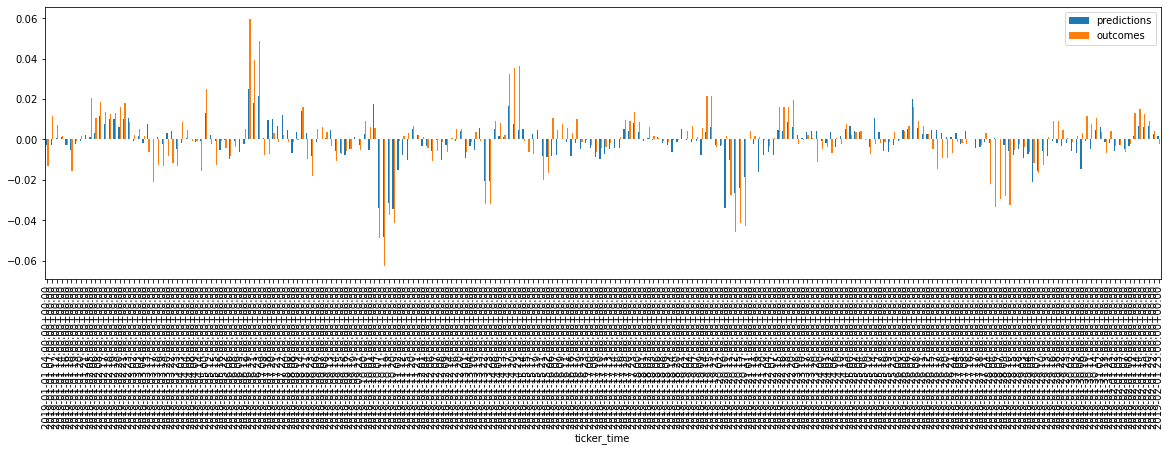

In [19]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


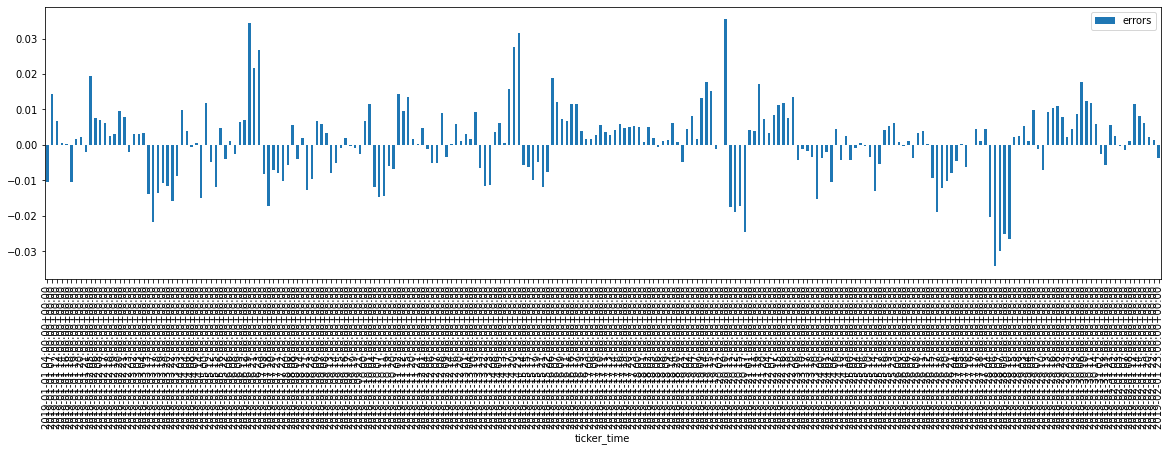

In [20]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


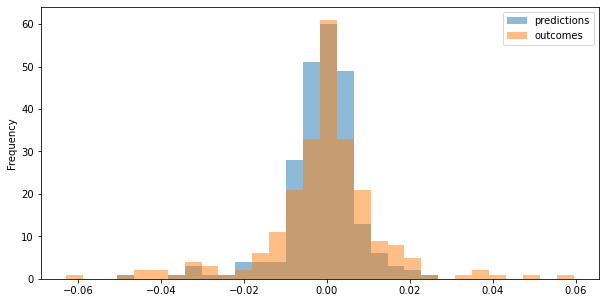

In [21]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


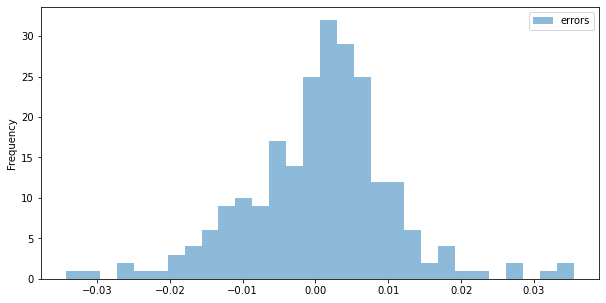

In [22]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


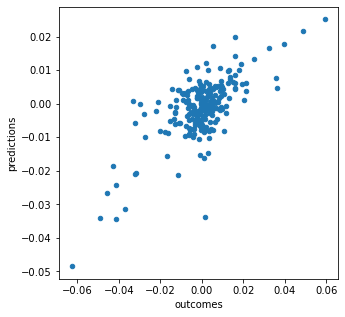

In [23]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [25]:
features = model.feature_importance.feature_importance
features[0:30]


,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,ATR_,0.05570,1.0,1.000000
1,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Mass_Index_9_25,0.03707,2.0,0.986667
2,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,day_of_year,0.03623,3.0,0.973333
3,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,MACDdiff_26_200,0.03456,4.0,0.960000
4,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,MACDdiff_20_200,0.03328,5.0,0.946667
5,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,SO_pct_k,0.02930,6.0,0.933333
6,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,BollingerB_200,0.02919,7.0,0.920000
7,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,BollingerB_50,0.02788,8.0,0.906667
8,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,BollingerB_150,0.02551,9.0,0.893333
9,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_200,0.02501,10.0,0.880000


<br>

### Least import features

In [27]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
55,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,hour_of_day,0.00618,56.0,0.266667
56,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_9,0.00607,57.0,0.253333
57,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_10,0.00600,58.0,0.240000
58,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Bollinger_pct_b_10,0.00573,59.0,0.226667
59,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Bollinger_pct_b_200,0.00558,60.0,0.213333
60,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,MACDsign_9_12,0.00536,61.0,0.200000
61,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_volume_10,0.00531,62.0,0.186667
62,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,MACDdiff_9_12,0.00528,63.0,0.173333
63,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_volume_20,0.00524,64.0,0.160000
64,f092df35606706b15e515b4a229add8b7e18772f,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Bollinger_pct_b_5,0.00443,65.0,0.146667


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
